# Entornos multiagentes

### 1. Disparejo

Considere un juego de disparejo entre cuatro jugadores, en el que cada jugador adopta la siguiente estrategia:
* El jugador **1** siempre escoge al azar entre las dos opciones.
* El jugador **2** escoge siempre hacia abajo sin importar lo que haya ocurrido anteriormente.
* El jugador **3** escoge la última opción ganadora de las partidas anteriores. En la primera jugada, escoge arriba.
* El jugador **4** escoge aquello opuesto al jugador 1 en la última partida. En la primera jugada, escoge al azar.

#### Simulación de 1000 juegos consecutivos

In [1]:
import agentpy as ap
import random
import pandas as pd

In [2]:
class Player(ap.Agent):
    def setup(self):
        if self.id == 1:
            self.pos = random.randrange(0, 2)
        elif self.id == 2:
            self.pos = 0
        elif self.id == 3: 
            self.pos = 1
        elif self.id == 4: 
            self.pos = random.randrange(0, 2)
        
    def disparejo(self, game):
        if (len(game.gamesData) < 1):
            return
        if self.id == 1:
            self.pos = random.randrange(0, 2)
        elif self.id == 2:
            self.pos = 0
        elif self.id == 3: 
            #Chooses the the last winning option, first time chooses up (1)
            if game.lastWin == -1:
                self.pos = 1
            else:
                self.pos = game.lastWin
        
        elif self.id == 4:
            # Chooses the opposite of the player 1 on the last round, first time chooses random
            p1Choice = game.gamesData[-1][1][0]
            if p1Choice == 1:
                self.pos = 0
            elif p1Choice == 0:
                self.pos = 1
            else:
                self.pos = random.randrange(0, 2)
            
    def getPosition(self):
        return int(self.pos)

In [3]:
def unique(arr):
    winner = -1
    choice = -1
    for agent, res in enumerate(arr):
        if(arr.count(res) == 1):
            winner = agent
            choice = arr[agent]
        
    return [winner, choice]

In [4]:
class GameModel(ap.Model):
    def setup(self):
        self.agents = ap.AgentList(self, 4, Player)
        self.lastMoves = self.agents.pos
        self.gamesData=[]
        self.lastWin = -1
    
    def step(self):
        self.agents.disparejo(self)
        gameRes = self.agents.getPosition()
        self.lastMove = self.agents.pos
        self.gamesData.append((unique(gameRes), gameRes))
        
        if self.gamesData[-1][0][1] != -1:
            self.lastWin = self.gamesData[-1][0][1]
        
    def update(self):
        self.record('Winner', unique(self.agents.pos)[0])
        self.record('WinningOption', unique(self.agents.pos)[1])
        self.record('Choices', self.agents.getPosition())
        
    def end(self):
        self.step()
        



In [5]:
parameters = {
    'agents': 4,
    'steps': 10000,
    'seed': 42,
}

model = GameModel(parameters)
results = model.run()

Completed: 6679 steps

Completed: 10000 steps
Run time: 0:00:00.400000
Simulation finished


In [6]:
data = results.variables.GameModel
data

,Winner,WinningOption,Choices
t,,,
0,-1,-1,"[1, 0, 1, 0]"
1,-1,-1,"[1, 0, 1, 0]"
2,2,1,"[0, 0, 1, 0]"
3,-1,-1,"[0, 0, 1, 1]"
4,1,0,"[1, 0, 1, 1]"
...,...,...,...
9996,0,1,"[1, 0, 0, 0]"
9997,2,1,"[0, 0, 1, 0]"
9998,1,0,"[1, 0, 1, 1]"


In [7]:
dataFreq = data['Winner'].replace(-1,'Empate')
dataFreq = dataFreq.value_counts()
dataFreq = dataFreq.to_frame()
dataFreq = dataFreq.rename(columns={'Winner': 'Victorias'})
dataFreq

,Victorias
Empate,4935
1,1892
2,1282
0,1281
3,611


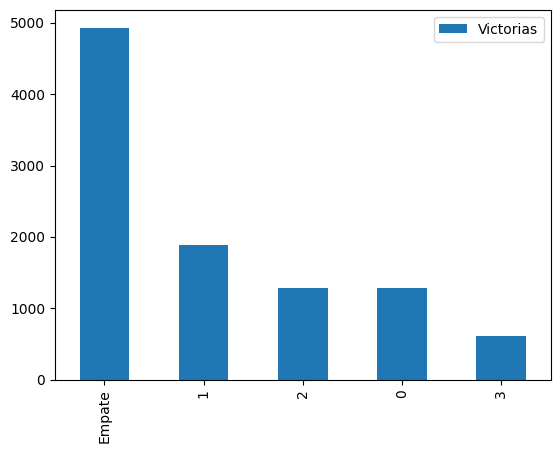

In [8]:
plot = dataFreq.plot.bar()